In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
# 1. Create a 3-class dataset
X, y = make_classification(
    n_samples=500, 
    n_features=2,   # keep it 2D so we can visualize
    n_informative=2, 
    n_redundant=0,
    n_classes=3, 
    n_clusters_per_class=1, 
    random_state=42
)

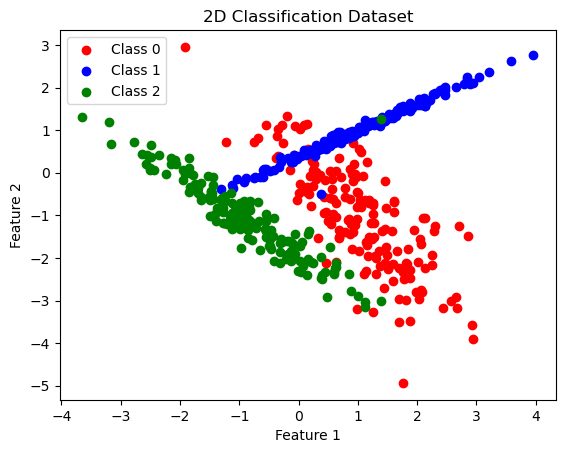

In [10]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Plot the dataset
plt.scatter(X[y==0,0], X[y==0,1], color='red', label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Class 1')
plt.scatter(X[y==2,0], X[y==2,1], color='green', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("2D Classification Dataset")
plt.show()


In [5]:
# 3. Multinomial Logistic Regression
log_reg_multi = LogisticRegression(solver="lbfgs")
log_reg_multi.fit(X_train, y_train)

# Predictions
y_pred = log_reg_multi.predict(X_test)

Multinomial Logistic Regression Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.88      0.95      0.91        55
           2       0.92      1.00      0.96        45

    accuracy                           0.92       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



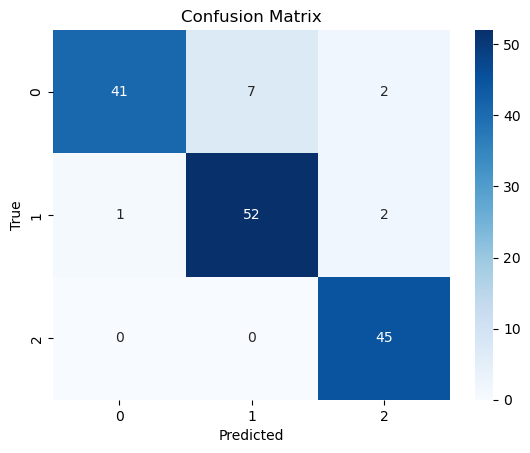

In [7]:
# 4. Evaluation
print("Multinomial Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

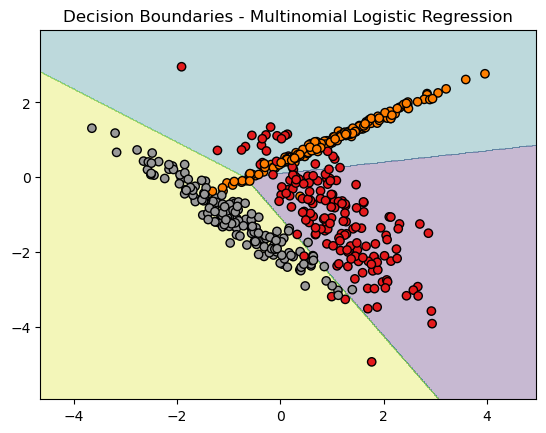

In [8]:
# 5. Decision Boundary Visualization
def plot_decision_boundary(model, X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Set1)
    plt.title("Decision Boundaries - Multinomial Logistic Regression")
    plt.show()

plot_decision_boundary(log_reg_multi, X, y)